In [1]:
# imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

import optuna


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function Definitions:

def print_accuracy(actual,predicted):
    match=0
    for i in range(0,len(actual)):
        if actual[i]==predicted[i]:
            match+=1
    accuracy=match/len(actual)
    print("matches= ",match,"/",len(actual)," accuracy= ",round(accuracy,2))

def print_accuracies(actual,predicted):
    match=0
    for i in range(0,len(actual)):
        if actual[i]==predicted[i]:
            match+=1
    accuracy=match/len(actual)
    return accuracy

def train_and_evaluate(model):
    kf = KFold(n_splits=5,shuffle=True,random_state=None)
    i=1
    train_accuracies=[]
    test_accuracies=[]
    for train_index, test_index in kf.split(feature_array):
        X_train, X_test = feature_array[train_index], feature_array[test_index]
        y_train, y_test = target_label[train_index], target_label[test_index]
        
        model.fit(X_train, y_train)
        
        train_predictions=model.predict(X_train)
        test_predictions=model.predict(X_test)
        
        train_accuracy=print_accuracies(y_train,train_predictions)
        train_accuracies.append(train_accuracy)
        test_accuracy=print_accuracies(y_test,test_predictions)
        test_accuracies.append(test_accuracy)
        
        print("\nFold",i,": Train accuracy= ",round(train_accuracy,2)," Test accuracy= ",round(test_accuracy,2))
        i+=1
    
    print("\nAvg train accuracy= ",round(np.array(train_accuracies).mean(),2))
    print("Avg test accuracy= ",round(np.array(test_accuracies).mean(),2))

def tnv(model):
    kf = KFold(n_splits=5,shuffle=True,random_state=None)
    i=1
    train_accuracies=[]
    test_accuracies=[]
    for train_index, test_index in kf.split(feature_array):
        X_train, X_test = feature_array[train_index], feature_array[test_index]
        y_train, y_test = target_label[train_index], target_label[test_index]
        
        model.fit(X_train, y_train)
        
        train_predictions=model.predict(X_train)
        test_predictions=model.predict(X_test)
        
        train_accuracy=print_accuracies(y_train,train_predictions)
        train_accuracies.append(train_accuracy)
        test_accuracy=print_accuracies(y_test,test_predictions)
        test_accuracies.append(test_accuracy)
        i+=1
    
    #return round(np.array(train_accuracies).mean(),2)
    return round(np.array(test_accuracies).mean(),2)

# Data exploration and feature engineering

## Attributes
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [3]:
dataframe=pd.read_csv("heart.csv")
dataframe.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
dataframe.shape

(918, 12)

In [5]:
# checking the ratios for categorical features.
dataframe['HeartDisease'].value_counts()     # there is no issue of class imbalance

1    508
0    410
Name: HeartDisease, dtype: int64

In [6]:
dataframe['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [7]:
dataframe['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [8]:
dataframe['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [9]:
dataframe['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
113      1
117      1
127      1
129      1
0        1
Name: RestingBP, Length: 67, dtype: int64

In [10]:
dataframe['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [11]:
print(dataframe.loc[dataframe['Sex'] == 'M']['HeartDisease'].value_counts())
print(dataframe.loc[dataframe['Sex'] == 'F']['HeartDisease'].value_counts())

1    458
0    267
Name: HeartDisease, dtype: int64
0    143
1     50
Name: HeartDisease, dtype: int64


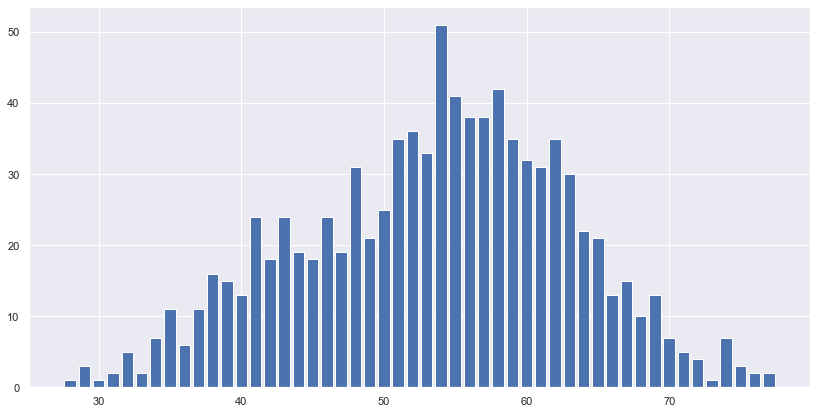

In [13]:
# plot the distributions of various attributes

distribution=dataframe['Age'].value_counts()
x = distribution.index
y = distribution.values
plt.figure(figsize=(14,7))
plt.bar(x,y)

#plt.savefig("plot Age before log.jpg")
plt.show()

<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

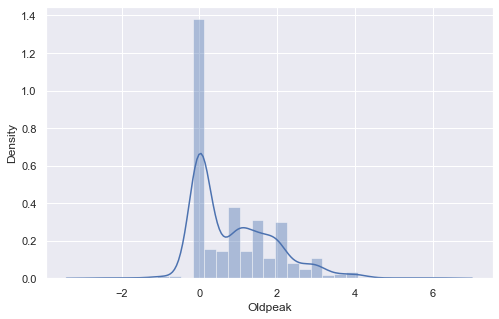

In [12]:
# using seaborn plots visualize properties of attributes.

sns.set(rc={'figure.figsize':(8,5)})
#sns.boxplot(test_df['Oldpeak'])
#plt.hist(dataframe['Age'])
sns.distplot(dataframe['Oldpeak'])

<AxesSubplot:xlabel='Oldpeak'>

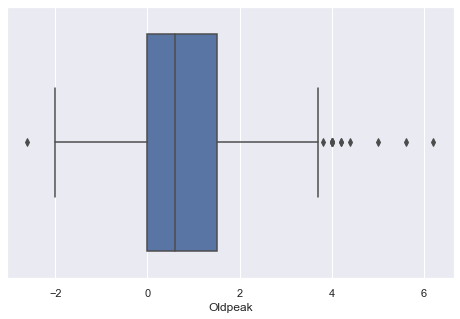

In [14]:
sns.boxplot(dataframe['Oldpeak'])

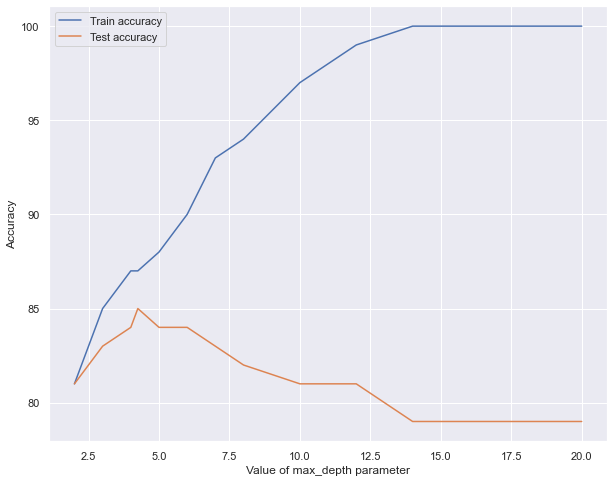

In [15]:
# Plot the train and test accuracies against the value of hyperparameters.

x=[2,3,4,4.25,5,6,7,8,10,12,14,20]
y=[81,85,87,87,88,90,93,94,97,99,100,100]
z=[81,83,84,85,84,84,83,82,81,81,79,79]
plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.plot(x,z)
plt.xlabel("Value of max_depth parameter")
plt.ylabel("Accuracy")
plt.legend(['Train accuracy','Test accuracy'])
#plt.savefig("accuracy vs Max_depth in DT.jpg")
plt.show()

# Creating One Hot Encodings for Categorical features

In [16]:
# creating one hot dummies for categorical features:

features = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
dataframe_new= pd.get_dummies(dataframe[features])
dataframe_new.shape

(918, 20)

# Feature Engineering

In [17]:
# Checking null values: Imputation
dataframe.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [18]:
# log transform   ## DONT RUN THIS CELL

df_trans=dataframe_new.copy()
df_trans['Age_log'] = np.log(df_trans['Age'])
df_trans.drop('Age', axis=1, inplace=True)
df_trans.head()

RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
0        140          289          0    172      0.0      0      1   
1        160          180          0    156      1.0      1      0   
2        130          283          0     98      0.0      0      1   
3        138          214          0    108      1.5      1      0   
4        150          195          0    122      0.0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                  0                  1                  0                 0   
1                  0                  0                  1                 0   
2                  0                  1                  0                 0   
3                  1                  0                  0                 0   
4                  0                  0                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up   Age_log  
0                 0              0              0            1  3.688879  
1                 0              0              1            0  3.891820  
2                 0              0              0            1  3.610918  
3                 1              0              1            0  3.871201  
4                 0              0              0            1  3.988984

In [19]:
# Removing outliers

test_df=dataframe_new.copy()
test_df['Cholesterol'] = test_df['Cholesterol'].mask(test_df['Cholesterol'] < 1, 237)
test_df['Cholesterol'] = test_df['Cholesterol'].mask(test_df['Cholesterol'] > 410, 237)
test_df['RestingBP'] = test_df['RestingBP'].mask(test_df['RestingBP'] < 85, 130)
test_df['RestingBP'] = test_df['RestingBP'].mask(test_df['RestingBP'] > 175, 130)
test_df['Oldpeak'] = test_df['Oldpeak'].mask(test_df['Oldpeak'] < -2, 0.6)
test_df['Oldpeak'] = test_df['Oldpeak'].mask(test_df['Oldpeak'] > 4, 0.6)
test_df.shape

(918, 20)

In [20]:
# Feature Scaling  ## RUN THIS CELL ONLY FOR KNN CLASSIFIER.

test_df2=test_df.copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(test_df2)
print(scaled[1])
feature_array=scaled

[0.42857143 0.82926829 0.29320988 0.         0.67605634 0.5
 1.         0.         0.         0.         1.         0.
 0.         1.         0.         1.         0.         0.
 1.         0.        ]


In [21]:
# Removing less important features:  # DONT RUN THIS CELL ALSO
test_df1=test_df.copy()
flist=['Sex_F','RestingBP','Sex_M','ChestPainType_ATA','FastingBS','ChestPainType_NAP','RestingECG_LVH','ST_Slope_Down','RestingECG_Normal','ChestPainType_TA','RestingECG_ST']
test_df1.drop(flist, axis=1, inplace=True)
test_df1.shape

(918, 9)

# Creating Feature and Target arrays.

In [22]:
# Creating feature_array
feature_array = np.array(test_df)
feature_array.shape

(918, 20)

In [23]:
# Creating target array
target_label=np.array(dataframe[['HeartDisease']])
target_label.shape

(918, 1)

In [24]:
# train-test set split

train_feature_array, test_feature_array, train_labels, test_labels = train_test_split(feature_array, target_label, test_size = 0.25, shuffle=True)

# Classification using a Support Vector Machine

In [25]:
# clf = SVC(kernel='linear')   we can also try kernel="rbf" 
clf = SVC(kernel='linear',C=1,random_state=42)    #clf = svm.SVC(kernel='linear', C=1, random_state=42)
clf

SVC(C=1, kernel='linear', random_state=42)

In [26]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(clf)


Fold 1 : Train accuracy=  0.86  Test accuracy=  0.9

Fold 2 : Train accuracy=  0.86  Test accuracy=  0.88

Fold 3 : Train accuracy=  0.89  Test accuracy=  0.83

Fold 4 : Train accuracy=  0.87  Test accuracy=  0.83

Fold 5 : Train accuracy=  0.87  Test accuracy=  0.86

Avg train accuracy=  0.87
Avg test accuracy=  0.86


In [27]:
# train and test normally using 75:25 train-test split, without 5 fold cross validation.

clf.fit(train_feature_array, train_labels)

train_predictions=clf.predict(train_feature_array)
test_predictions=clf.predict(test_feature_array)

print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

Train: matches=  600 / 688  accuracy=  0.87
Test: matches=  191 / 230  accuracy=  0.83


# Using Random Forest Classifier

In [28]:
# rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=5)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=1)  # 39,8.5
rf_clf

RandomForestClassifier(max_depth=25, random_state=1)

In [29]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(rf_clf)


Fold 1 : Train accuracy=  1.0  Test accuracy=  0.89

Fold 2 : Train accuracy=  1.0  Test accuracy=  0.88

Fold 3 : Train accuracy=  1.0  Test accuracy=  0.84

Fold 4 : Train accuracy=  1.0  Test accuracy=  0.85

Fold 5 : Train accuracy=  1.0  Test accuracy=  0.89

Avg train accuracy=  1.0
Avg test accuracy=  0.87


In [30]:
# train and test normally using 75:25 train-test split, without 5 fold cross validation.

rf_clf.fit(train_feature_array, train_labels)

train_predictions=rf_clf.predict(train_feature_array)
test_predictions=rf_clf.predict(test_feature_array)

print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

Train: matches=  688 / 688  accuracy=  1.0
Test: matches=  198 / 230  accuracy=  0.86


In [31]:
# Printing the probabilities of the made classification.

rf_clf.predict_proba(test_feature_array)[:10]

array([[1.  , 0.  ],
       [0.58, 0.42],
       [0.3 , 0.7 ],
       [0.03, 0.97],
       [0.33, 0.67],
       [0.7 , 0.3 ],
       [0.05, 0.95],
       [0.03, 0.97],
       [0.43, 0.57],
       [0.51, 0.49]])

# Using Decision Tree Classifier

In [32]:
dt_clf=tree.DecisionTreeClassifier(max_depth=4.25,random_state=None,splitter='random')  #max_depth=4.25
dt_clf

DecisionTreeClassifier(max_depth=4.25, splitter='random')

In [33]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(dt_clf)


Fold 1 : Train accuracy=  0.87  Test accuracy=  0.87

Fold 2 : Train accuracy=  0.87  Test accuracy=  0.85

Fold 3 : Train accuracy=  0.87  Test accuracy=  0.81

Fold 4 : Train accuracy=  0.87  Test accuracy=  0.84

Fold 5 : Train accuracy=  0.86  Test accuracy=  0.85

Avg train accuracy=  0.87
Avg test accuracy=  0.84


In [34]:
# train and test normally using 75:25 train-test split, without 5 fold cross validation.

dt_clf.fit(train_feature_array, train_labels)

train_predictions=dt_clf.predict(train_feature_array)
test_predictions=dt_clf.predict(test_feature_array)

print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

Train: matches=  596 / 688  accuracy=  0.87
Test: matches=  187 / 230  accuracy=  0.81


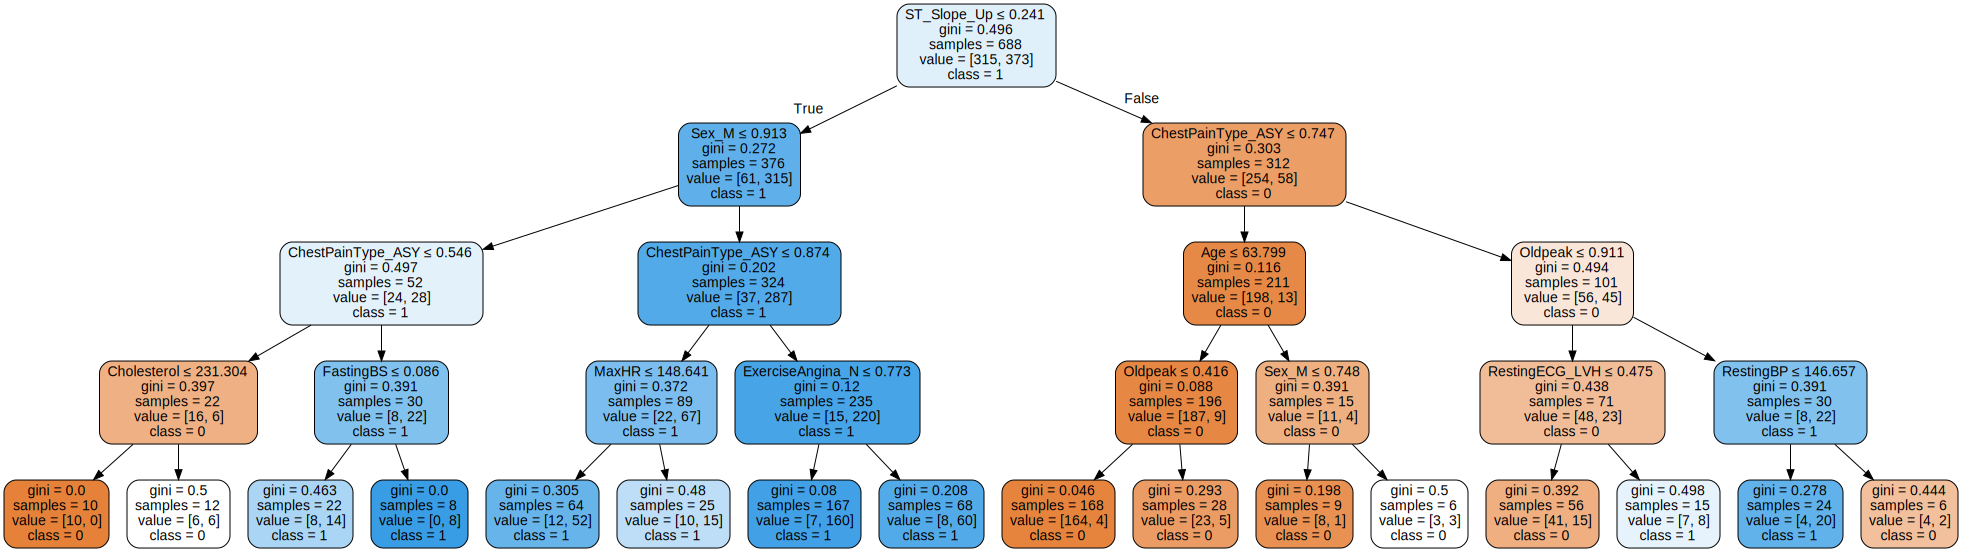

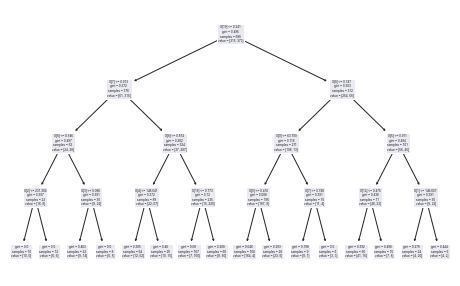

In [35]:
# WE CAN USE THIS CODE SNIPPET TO SEE THE TREE FORMED AND HENCE THE ATTRIBUTES USED FOR DECISION.

tree.plot_tree(dt_clf)
import graphviz 
dot_data = tree.export_graphviz(dt_clf, out_file=None, feature_names=dataframe_new.columns,  class_names=["0","1"],  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Using Logistic Regression Classifier

In [36]:
# Can be used because it is a binary classification task.

lr_clf = LogisticRegression(random_state=0)
lr_clf

LogisticRegression(random_state=0)

In [37]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(lr_clf)


Fold 1 : Train accuracy=  0.87  Test accuracy=  0.86

Fold 2 : Train accuracy=  0.86  Test accuracy=  0.89

Fold 3 : Train accuracy=  0.86  Test accuracy=  0.88

Fold 4 : Train accuracy=  0.88  Test accuracy=  0.83

Fold 5 : Train accuracy=  0.87  Test accuracy=  0.85

Avg train accuracy=  0.87
Avg test accuracy=  0.86


In [38]:
# train and test normally using 75:25 train-test split, without 5 fold cross validation.

lr_clf.fit(train_feature_array, train_labels)

train_predictions=lr_clf.predict(train_feature_array)
test_predictions=lr_clf.predict(test_feature_array)

print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

Train: matches=  601 / 688  accuracy=  0.87
Test: matches=  195 / 230  accuracy=  0.85


In [39]:
# Printing the probabilities of the made classification.

lr_clf.predict_proba(test_feature_array)[:10]

array([[0.95430932, 0.04569068],
       [0.63122593, 0.36877407],
       [0.1835755 , 0.8164245 ],
       [0.02125058, 0.97874942],
       [0.35853184, 0.64146816],
       [0.79945582, 0.20054418],
       [0.01950854, 0.98049146],
       [0.15945688, 0.84054312],
       [0.46822197, 0.53177803],
       [0.75737652, 0.24262348]])

# KNN

In [40]:
# we need to play with the value of k.

knn_clf = KNeighborsClassifier(n_neighbors=10)  # initially 15
knn_clf

KNeighborsClassifier(n_neighbors=10)

In [491]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(knn_clf)


Fold 1 : Train accuracy=  0.86  Test accuracy=  0.88

Fold 2 : Train accuracy=  0.87  Test accuracy=  0.83

Fold 3 : Train accuracy=  0.86  Test accuracy=  0.87

Fold 4 : Train accuracy=  0.87  Test accuracy=  0.86

Fold 5 : Train accuracy=  0.87  Test accuracy=  0.82

Avg train accuracy=  0.87
Avg test accuracy=  0.85


In [41]:
# train and test normally using 75:25 train-test split, without 5 fold cross validation.

knn_clf.fit(train_feature_array, train_labels)

train_predictions=knn_clf.predict(train_feature_array)
test_predictions=knn_clf.predict(test_feature_array)

print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

Train: matches=  526 / 688  accuracy=  0.76
Test: matches=  141 / 230  accuracy=  0.61


In [42]:
# Another way of printing accuracies:

print('Train accuracy %s' % knn_clf.score(train_feature_array, train_labels))
print('Test accuracy %s' % knn_clf.score(test_feature_array, test_labels)) 

Train accuracy 0.7645348837209303
Test accuracy 0.6130434782608696


In [43]:
# Printing Precision Recall and F1-score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Test accuracy %s' % accuracy_score(test_labels,test_predictions))
print(confusion_matrix(test_labels,test_predictions)) 
print(classification_report(test_labels,test_predictions)) 

Test accuracy 0.6130434782608696
[[59 36]
 [53 82]]
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        95
           1       0.69      0.61      0.65       135

    accuracy                           0.61       230
   macro avg       0.61      0.61      0.61       230
weighted avg       0.63      0.61      0.62       230



# XGBoost

In [44]:
xgb_clf = XGBClassifier()
xgb_clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [45]:
# train and evaluate using 5 fold cross validation.
train_and_evaluate(xgb_clf)

[10:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Fold 1 : Train accuracy=  1.0  Test accuracy=  0.89
[10:38:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Fold 2 : Train accuracy=  1.0  Test accuracy=  0.84
[10:38:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'

In [46]:
# train and test normally using 75:25 train-test split, without 5 fold cross validation.

xgb_clf.fit(train_feature_array, train_labels)

train_predictions=xgb_clf.predict(train_feature_array)
test_predictions=xgb_clf.predict(test_feature_array)

print("Train: ",end="")
print_accuracy(train_labels,train_predictions)
print("Test: ",end="")
print_accuracy(test_labels,test_predictions)

[10:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: matches=  688 / 688  accuracy=  1.0
Test: matches=  195 / 230  accuracy=  0.85


In [47]:
# Printing the probabilities of the made classification.

xgb_clf.predict_proba(test_feature_array)[:10]

array([[9.9849123e-01, 1.5087475e-03],
       [1.0787952e-01, 8.9212048e-01],
       [7.5822771e-01, 2.4177229e-01],
       [4.7802925e-04, 9.9952197e-01],
       [4.8453629e-01, 5.1546371e-01],
       [9.8215550e-01, 1.7844483e-02],
       [9.5957518e-04, 9.9904042e-01],
       [5.4365396e-04, 9.9945635e-01],
       [9.3795550e-01, 6.2044516e-02],
       [5.1445687e-01, 4.8554310e-01]], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

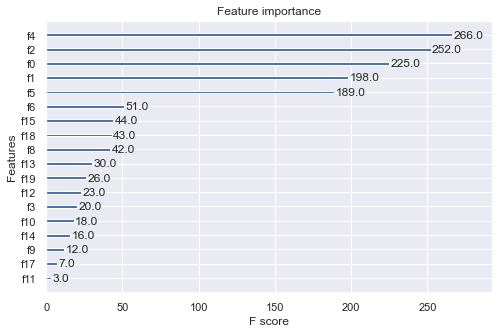

In [48]:
# Printing the importancce of features while making classification.

plot_importance(xgb_clf)

# Optuna
## using optuna for hyperparameter Tuning.

In the objective function we can uncomment the parameters for the algorithm we want to claffisy with. Also uncomment the definition of the algorithm also. Keep everything else commented out. Run the "Run Optuna" cell for starting optuna.

In [49]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 50)
    max_depth = int(trial.suggest_loguniform('max_depth', 1, 30))
    
    #kernel = trial.suggest_categorical('kernel',['linear','rbf','poly','sigmoid','precomputed'])
    #C = trial.suggest_int('C', 0, 5)
    #degree = trial.suggest_int('degree', 1, 25)
    
    #solver = trial.suggest_categorical('solver',['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    
    #n_neighbors = trial.suggest_int('n_neighbors', 1, 100)
    #weights = trial.suggest_categorical('weights',['uniform','distance'])
    #algorithm = trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute'])
    
#     n_estimators = trial.suggest_int('n_estimators', 1, 100)
#     max_depth = int(trial.suggest_loguniform('max_depth', 1, 30))
#     #learning_rate = trial.suggest_float('learning_rate', 0, 1)
#     booster = trial.suggest_categorical('booster',['gbtree', 'gblinear', 'dart'])
#     tree_method = trial.suggest_categorical('tree_method',['exact', 'approx', 'hist'])
#     n_jobs = trial.suggest_int('n_jobs', 1, 10)
    
    rf_cls = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=5)
    #dt_cls = tree.DecisionTreeClassifier(max_depth=max_depth,random_state=None,splitter='random')
    #cls = SVC(kernel=kernel, C=C, degree=degree, random_state=None)
    #lr_cls = LogisticRegression(solver=solver, random_state=None)
    #knn_cls = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)
    #xgb_cls = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, booster=booster, tree_method=tree_method, n_jobs=n_jobs)
    return tnv(rf_cls)

In [50]:
# Run Optuna

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=300)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-11-25 10:20:44,321] A new study created in memory with name: no-name-fa5f97c1-3cb9-47f2-bc70-936f11f8d7e6
[I 2021-11-25 10:20:44,522] Trial 0 finished with value: 0.87 and parameters: {'n_estimators': 15, 'max_depth': 18.320442352105893}. Best is trial 0 with value: 0.87.
[I 2021-11-25 10:20:44,643] Trial 1 finished with value: 0.84 and parameters: {'n_estimators': 10, 'max_depth': 13.899344929208976}. Best is trial 0 with value: 0.87.
[I 2021-11-25 10:20:44,950] Trial 2 finished with value: 0.86 and parameters: {'n_estimators': 32, 'max_depth': 7.868237904618494}. Best is trial 0 with value: 0.87.
[I 2021-11-25 10:20:45,242] Trial 3 finished with value: 0.85 and parameters: {'n_estimators': 24, 'max_depth': 14.473802940601178}. Best is trial 0 with value: 0.87.
[I 2021-11-25 10:20:45,557] Trial 4 finished with value: 0.85 and parameters: {'n_estimators': 36, 'max_depth': 3.795190896238109}. Best is trial 0 with value: 0.87.
[I 2021-11-25 10:20:45,977] Trial 5 finished with val

[I 2021-11-25 10:20:58,606] Trial 45 finished with value: 0.86 and parameters: {'n_estimators': 25, 'max_depth': 4.7795401711982874}. Best is trial 26 with value: 0.88.
[I 2021-11-25 10:20:59,039] Trial 46 finished with value: 0.86 and parameters: {'n_estimators': 43, 'max_depth': 15.398469518242283}. Best is trial 26 with value: 0.88.
[I 2021-11-25 10:20:59,335] Trial 47 finished with value: 0.86 and parameters: {'n_estimators': 27, 'max_depth': 14.345488367442227}. Best is trial 26 with value: 0.88.
[I 2021-11-25 10:20:59,477] Trial 48 finished with value: 0.84 and parameters: {'n_estimators': 12, 'max_depth': 25.196915080982077}. Best is trial 26 with value: 0.88.
[I 2021-11-25 10:20:59,726] Trial 49 finished with value: 0.86 and parameters: {'n_estimators': 22, 'max_depth': 18.99822708761005}. Best is trial 26 with value: 0.88.
[I 2021-11-25 10:21:00,173] Trial 50 finished with value: 0.87 and parameters: {'n_estimators': 38, 'max_depth': 21.201677295055045}. Best is trial 26 with 

[I 2021-11-25 10:21:17,534] Trial 91 finished with value: 0.86 and parameters: {'n_estimators': 42, 'max_depth': 13.545079981505179}. Best is trial 26 with value: 0.88.
[I 2021-11-25 10:21:17,974] Trial 92 finished with value: 0.86 and parameters: {'n_estimators': 44, 'max_depth': 5.857605841070124}. Best is trial 26 with value: 0.88.
[I 2021-11-25 10:21:18,308] Trial 93 finished with value: 0.86 and parameters: {'n_estimators': 31, 'max_depth': 7.671126439521789}. Best is trial 26 with value: 0.88.
[I 2021-11-25 10:21:18,819] Trial 94 finished with value: 0.86 and parameters: {'n_estimators': 47, 'max_depth': 10.063222040877362}. Best is trial 26 with value: 0.88.
[I 2021-11-25 10:21:19,335] Trial 95 finished with value: 0.86 and parameters: {'n_estimators': 48, 'max_depth': 10.811073273409502}. Best is trial 26 with value: 0.88.
[I 2021-11-25 10:21:19,740] Trial 96 finished with value: 0.85 and parameters: {'n_estimators': 36, 'max_depth': 17.98426150822014}. Best is trial 26 with va

Number of finished trials: 100
Best trial:
  Value: 0.88
  Params: 
    n_estimators: 45
    max_depth: 18.596436255867754


In [51]:
# import plotly
# optuna.visualization.plot_optimization_history(study)
# optuna.visualization.plot_slice(study)

## Demo of the running application
This is the prediction application's back-end. Get the values of patient's test reports and fill in the variables an then
call the function "predict_heart_disease". The function will print whether the patient have heart disease or not alond with
the chances of disease.

In [52]:
#imports and function definitions:

import joblib
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

def predict_heart_disease(reports):
    Age=reports[0][0]
    RestingBP=reports[0][3]
    Cholesterol=reports[0][4]
    FastingBS=reports[0][5]
    MaxHR=reports[0][7]
    Oldpeak=reports[0][9]
    Sex_F=0
    Sex_M=0
    ChestPainType_ASY=0
    ChestPainType_ATA=0
    ChestPainType_NAP=0
    ChestPainType_TA=0
    RestingECG_LVH=0
    RestingECG_Normal=0
    RestingECG_ST=0
    ExerciseAngina_N=0
    ExerciseAngina_Y=0
    ST_Slope_Down=0
    ST_Slope_Flat=0
    ST_Slope_Up=0
    
    if reports[0][1]=='M':
        Sex_M=1
    else:
        Sex_F=1
    
    if reports[0][2]=='ASY':
        ChestPainType_ASY=1
    elif reports[0][2]=='ATA':
        ChestPainType_ATA=1
    elif reports[0][2]=='NAP':
        ChestPainType_NAP=1
    else:
        ChestPainType_TA=1
    
    if reports[0][6]=='LVH':
        RestingECG_LVH=1
    elif reports[0][6]=='Normal':
        RestingECG_Normal=1
    else:
        RestingECG_ST=1
    
    if reports[0][8]=='Y':
        ExerciseAngina_Y=1
    else:
        ExerciseAngina_N=1
    
    if reports[0][10]=='Up':
        ST_Slope_Up=1
    elif reports[0][10]=='Down':
        ST_Slope_Down=1
    else:
        ST_Slope_Flat=1
    
    new_reports=[[Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up]]
    
    df_reports=pd.DataFrame(new_reports,columns=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T'])
    
    demo_feature_array = np.array(df_reports)
    
    rf_clf_loaded = joblib.load('saved_model_rf_clf.pkl')
    
    demo_prediction = rf_clf_loaded.predict(demo_feature_array)
    
    chances_0 = round(rf_clf_loaded.predict_proba(demo_feature_array)[0][0],2)*100
    chances_1 = round(rf_clf_loaded.predict_proba(demo_feature_array)[0][1],2)*100
    
    if demo_prediction[0]==0:
        prediction="The patient does not have a heart disease"
    elif demo_prediction[0]==1:
        prediction="The patient have a heart disease, and the chances are "+str(chances_1)+" %"
    return prediction

In [54]:
# Enter the Values from the test reports of the patient:

Age = 25
Sex = 'F'
ChestPainType = 'ASY'
RestingBP = 120
Cholesterol = 250
FastingBS = 0
RestingECG = 'Normal'
MaxHR = 108
ExerciseAngina = 'Y'
Oldpeak = 1.5
ST_Slope = 'Flat'

reports = [[Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope]]

prediction = predict_heart_disease(reports)
prediction

'The patient have a heart disease, and the chances are 74.0 %'